In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import random
import math
import csv
from scipy.stats import poisson 
import matplotlib as mpl
from matplotlib import colors as mpl_colors


# Set the pars and import the data

In [32]:
N_all = 1024
N = 32
n_tasks = 7
n_latent = 4
missing_exp = False
epochs = 100
plot_interpolation = "None"


In [33]:
if missing_exp == True:
    n_folds = 4
    n_missing_values = 256
else:
    n_folds = 1
    n_missing_values = 0

In [34]:
results_paper = False
if results_paper == True:
    folder = 'Results_paper/'
else:
    folder = ''

In [35]:
outputs = np.loadtxt('../Data/crime_experiments/outputs_crime')
inputs = np.loadtxt('../Data/crime_experiments/inputs_crime')

##### TO BE REDEFINED
cell_inside = np.loadtxt('../Data/crime_experiments/cell_inside_ny')
cell_inside = cell_inside.reshape(N,N)
cell_inside[cell_inside == 0] = np.nan

In [36]:
# Import outputs with missing data
data_final_with_NOna = outputs

In [37]:
crime_list_name = ['Burglary','Felony Assault','Grand Larceny', 'Grand Larceny of MV', 'Petit Larceny', 
                  'Petit Larceny of MV', 'Robbery']


# Import the predictions for missing data exp

In [38]:
method = 'MCPM'
prior_mixing_weights = 'Normal'
missing_exp = True 
inputs_dimension = 2
n_folds = 4
n_missing_values = N_all/4

In [39]:
final_dataset_MT_Normal = np.load('../Data/crime_experiments/'+ folder + 'final_dataset_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
latent_means_MT_Normal = np.load('../Data/crime_experiments/' + folder + 'latent_means_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
latent_vars_MT_Normal = np.load('../Data/crime_experiments/' + folder + 'latent_variances_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
means_w_MT_Normal = np.load('../Data/crime_experiments/' + folder + 'means_weights_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
vars_w_MT_Normal = np.load('../Data/crime_experiments/' + folder + 'covars_weights_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
offsets_MT_Normal = np.load('../Data/crime_experiments/' + folder + 'offsets_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")

cp_MCPM_Normal = np.zeros((N_all,n_tasks))
for t in xrange(n_tasks):
    cp_MCPM_Normal[:,t] = final_dataset_MT_Normal[0,:, t + 9]/np.sum(final_dataset_MT_Normal[0,:, 9:16], axis = 1)

In [42]:
method = 'LGCP'
prior_mixing_weights = 'Normal'
missing_exp = True 
n_folds = 4
n_missing_values = N_all/4

final_dataset_ST_Normal = np.load('../Data/crime_experiments/'+ folder + 'final_dataset_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
latent_means_ST_Normal = np.load('../Data/crime_experiments/' + folder + 'latent_means_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
latent_vars_ST_Normal = np.load('../Data/crime_experiments/' + folder + 'latent_variances_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
means_w_ST_Normal = np.load('../Data/crime_experiments/' + folder + 'means_weights_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
vars_w_ST_Normal = np.load('../Data/crime_experiments/' + folder + 'covars_weights_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
offsets_ST_Normal = np.load('../Data/crime_experiments/' + folder + 'offsets_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")


In [77]:
method = 'MCPM'
prior_mixing_weights = 'GP'
missing_exp = True 
inputs_dimension = 2
n_folds = 4
n_missing_values = N_all/4
final_dataset_MT_GP = np.load('../Data/crime_experiments/'+ folder + 'final_dataset_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
latent_means_MT_GP = np.load('../Data/crime_experiments/' + folder + 'latent_means_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
latent_vars_MT_GP = np.load('../Data/crime_experiments/' + folder + 'latent_variances_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
means_w_MT_GP = np.load('../Data/crime_experiments/' + folder + 'means_weights_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
vars_w_MT_GP = np.load('../Data/crime_experiments/' + folder + 'covars_weights_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")
offsets_MT_GP = np.load('../Data/crime_experiments/' + folder + 'offsets_'+ prior_mixing_weights + "_" + method + "_" + str(missing_exp)+ ".npy")


# Plot crime data with missing NaN

In [78]:
# Import outputs with missing data
prior_mixing_weights = 'Normal'
missing_exp = True
inputs_dimension = 2
data_final_with_na = np.loadtxt('../Data/crime_experiments/'+ folder + 'data_final_with_na_'+ prior_mixing_weights + "_" + 'MT'+ "_" + str(missing_exp)).reshape(n_folds, N_all, n_tasks + inputs_dimension)
ytrain_non_missing_index = np.loadtxt('../Data/crime_experiments/ytrain_non_missing_index')


In [79]:
# Plot missing locations
# plt.imshow(ytrain_non_missing_index[:,1].reshape(32,32))
# plt.show()

In [80]:
fold = 0
na_data = np.zeros((n_tasks, N, N))
masked_array = np.zeros((n_tasks, N, N))
im = [None] * n_tasks
for t in xrange(n_tasks):
    na_data[t] = data_final_with_na[fold,:,t+2].reshape(N,N)
    na_data[t][~np.isnan(na_data[t])] =  0
    na_data[t][np.isnan(na_data[t])] = 1
    na_data[t][na_data[t] == 0] =  np.nan
    
    masked_array[t] = np.ma.array(na_data[t], mask=np.isnan(data_final_with_na[fold,:,t+2].reshape(N,N)))


In [81]:
bounds = [None] * n_tasks
for t in xrange(n_tasks):
    bounds[t] = [0,np.max(data_final_with_NOna[:,t])/2, int(np.max(data_final_with_NOna[:,t]))]


In [82]:
cell_inside = cell_inside.reshape(N,N)

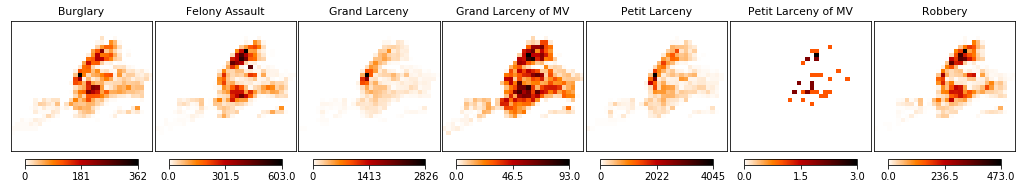

In [83]:
cmap = "gist_heat_r"
mpl.rcParams.update({'font.size': 9})
size_cbar_ticks = 10
transparency = 0.5
shrink = 0.8
pad=0.05
cmap1 = mpl.cm.gray
cmap1.set_bad('white',alpha = 0.0)

xmin, xmax, ymin, ymax = np.amin(data_final_with_na[fold,:,1]), np.amax(data_final_with_na[fold,:,1]), np.amin(data_final_with_na[fold,:,0]), np.amax(data_final_with_na[fold,:,0])
extent = xmin, xmax, ymin, ymax

fig, axs = plt.subplots(1,7, sharex = 'col', sharey = 'row')
fig.set_figheight(3)
fig.set_figwidth(18)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.02)

axs = axs.ravel()

for i in range(7):

        color_max = np.amax((((data_final_with_NOna[:,i])[~np.isnan(data_final_with_NOna[:,i])])))
        color_min = np.amin((((data_final_with_NOna[:,i])[~np.isnan(data_final_with_NOna[:,i])])))

        
        im[i] = axs[i].imshow(data_final_with_NOna[:, i].reshape(N,N)*cell_inside, extent=extent, 
                 aspect = 'auto', cmap=cmap, interpolation='None',
                 vmin = color_min, vmax = color_max)
        
        #axs[i].imshow(masked_array[i], interpolation='nearest', cmap = cmap1, alpha = transparency,
          #extent=extent)
        
        axs[i].title.set_text(crime_list_name[i])
        

        b = bounds[i]
        cbar = plt.colorbar(im[i], ax = axs[i],orientation="horizontal", pad=pad, shrink = shrink, ticks = b)
        cbar.ax.tick_params(labelsize=size_cbar_ticks)

        axs[i].set_yticks([])
        axs[i].set_xticks([])         

    
name = "data_crime" + str(cmap)
fig.savefig(name + '.png')

plt.show()

# Plot with Normal prior

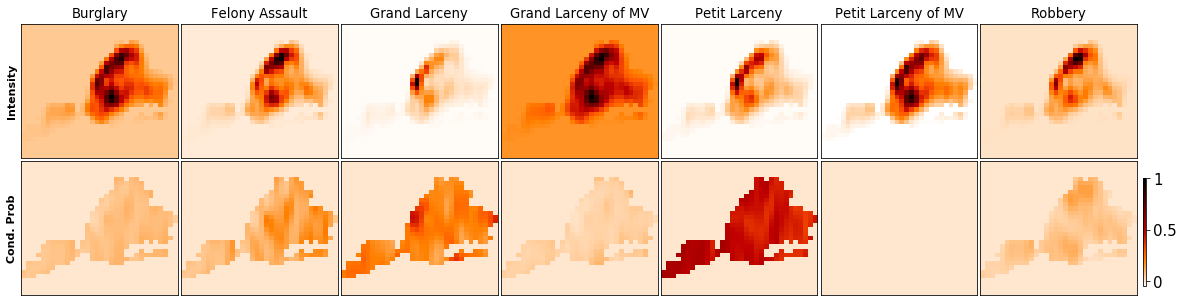

In [84]:
fold = 0
task = 0
mpl.rcParams.update({'font.size': 11})
size_cbar_ticks = 15
rescale = 20
cmap = "gist_heat_r"
inducing = 'ind'
norm = mpl.colors.Normalize(vmin=-100.,vmax=100)

extent = (np.amin(final_dataset_MT_Normal[fold,:,0]), 
          np.amax(final_dataset_MT_Normal[fold,:,0]), 
          np.amin(final_dataset_MT_Normal[fold,:,1]), 
          np.amax(final_dataset_MT_Normal[fold,:,1]))

fig, axs = plt.subplots(2,7, sharex = 'col', sharey = 'row')
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)

axs = axs.ravel()

for i in range(14):

    if i in range(0,7):


        color_max = np.amax(final_dataset_MT_Normal[fold, :, i + 9])
        color_min = np.amin(final_dataset_MT_Normal[fold, :, i + 9])
        color_min = color_min - rescale

        if i == 5:
            color_max = np.amax(final_dataset_MT_Normal[fold, :, i + 9])
            color_min = np.amin(final_dataset_MT_Normal[fold, :, i + 9])

        axs[i].imshow(final_dataset_MT_Normal[fold, :, i + 9].reshape(N,N)*cell_inside, extent=extent, 
                 aspect = 'auto', cmap=cmap, interpolation='None',
                 vmin = color_min, vmax = color_max)
        axs[i].title.set_text(crime_list_name[i])

        if i == 0:
             axs[i].set_ylabel('Intensity', fontweight="bold")

    if i in range(7,14):

        color_max = 1
        color_min = 0 - 0.05
        
        axs[i].imshow(cp_LGCPN_Normal[:,i-7].reshape(N,N)*cell_inside, extent=extent, 
                      aspect = 'auto', cmap=cmap, interpolation='None',
                      vmin = color_min, vmax = color_max)
        if i == 13:
            im = axs[i].imshow(cp_LGCPN_Normal[:,i-7].reshape(N,N)*cell_inside, extent=extent, 
                      aspect = 'auto', cmap=cmap, interpolation='None',
                      vmin = color_min, vmax = color_max)
            bounds = [0, 0.5, 1]
            cax2 = fig.add_axes([0.88, 0.15, 0.05, 0.3], aspect=30)
            cbar = plt.colorbar(im, cax=cax2, ticks = bounds)
            cbar.ax.set_yticklabels(['0', '0.5', '1']) 
            cbar.ax.tick_params(labelsize=size_cbar_ticks)


        if i == 7:
             axs[i].set_ylabel('Cond. Prob', fontweight="bold")

    axs[i].grid(False)
    axs[i].set_yticks([]) 
    axs[i].set_xticks([]) 
    axs[i].grid(False)
    
#name = "Figure7_LGCPN" + str(cmap)
#fig.savefig(name + '.png')
plt.show()

# Plot ST learning

In [85]:
n_folds = 4
inputs_dimension = 2
final_dataset_ST_Normal = final_dataset_ST_Normal.reshape(n_folds, N_all, (n_tasks*3 + inputs_dimension))

ValueError: cannot reshape array of size 23552 into shape (4,1024,23)

In [ ]:
# Conditional probabilities for ST

In [86]:
fold = 0
cp_LGCP_ST_Normal = np.zeros((N_all,n_tasks))
for t in xrange(n_tasks):
    cp_LGCP_ST_Normal[:,t] = final_dataset_ST_Normal[fold,:, t + 9]/np.sum(final_dataset_ST_Normal[fold,:, 9:16], axis = 1)

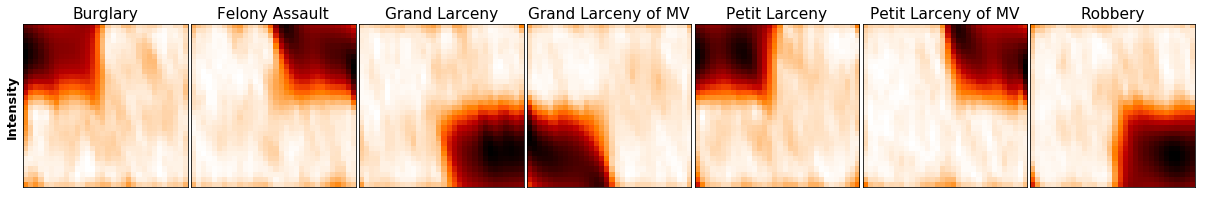

In [87]:
mpl.rcParams.update({'font.size': 12.8})
size_cbar_ticks = 15
rescale = 20
fold = 0
cmap = "gist_heat_r"
inducing = 'ind'
norm = mpl.colors.Normalize(vmin=-100.,vmax=100)

extent = (np.amin(final_dataset_ST_Normal[fold,:,0]), np.amax(final_dataset_ST_Normal[fold,:,0]), np.amin(final_dataset_ST_Normal[fold,:,1]), np.amax(final_dataset_ST_Normal[fold,:,1]))

fig, axs = plt.subplots(1,7, sharex = 'col', sharey = 'row')
fig.set_figheight(3)
fig.set_figwidth(21)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)

axs = axs.ravel()

for i in range(n_tasks):
#     print('i',i)
#     print('i +9',i + 9)
#     print('to plot',final_dataset_ST_Normal[fold,:, 9 + i ][~np.isnan(final_dataset_ST_Normal[fold,:, 9 + i])])
    color_max = np.amax((final_dataset_ST_Normal[fold,:, 9 + i ][~np.isnan(final_dataset_ST_Normal[fold,:, 9 + i])]))

    color_min = np.amin((final_dataset_ST_Normal[fold,:, 9 + i][~np.isnan(final_dataset_ST_Normal[fold,:, 9 + i])]))
#     print('min',color_max) 
#     print('max',color_min)

    axs[i].imshow(final_dataset_ST_Normal[fold,:, 9 + i].reshape(N,N), extent=extent, aspect = 'auto', 
                  cmap=cmap, interpolation='None', vmin = color_min, vmax = color_max)
    axs[i].title.set_text(crime_list_name[i])
    if i == 0:
        axs[i].set_ylabel('Intensity', fontweight="bold")


    axs[i].grid(False)
    axs[i].set_yticks([]) 
    axs[i].set_xticks([]) 
    axs[i].grid(False)
    
# name = "Figure3" + str(cmap)
# fig.savefig(name + '.png')
plt.show()

In [58]:
# ST learning but cell inside

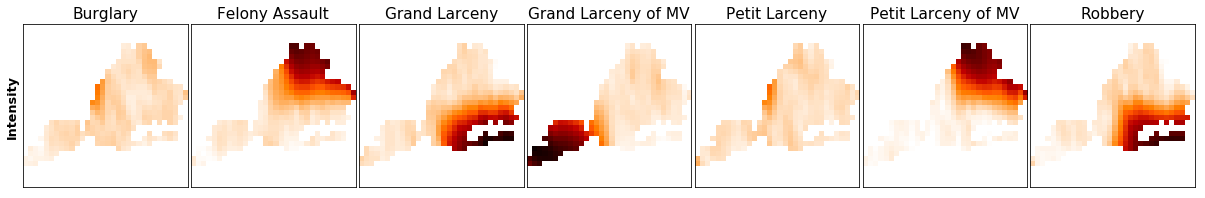

In [59]:
mpl.rcParams.update({'font.size': 12.8})
size_cbar_ticks = 15
rescale = 20
fold = 0
cmap = "gist_heat_r"
inducing = 'ind'
norm = mpl.colors.Normalize(vmin=-100.,vmax=100)

extent = (np.amin(final_dataset_ST_Normal[fold,:,0]), np.amax(final_dataset_ST_Normal[fold,:,0]), np.amin(final_dataset_ST_Normal[fold,:,1]), np.amax(final_dataset_ST_Normal[fold,:,1]))

fig, axs = plt.subplots(1,7, sharex = 'col', sharey = 'row')
fig.set_figheight(3)
fig.set_figwidth(21)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)

axs = axs.ravel()

for i in range(n_tasks):
#     print('i',i)
#     print('i +9',i + 9)
#     print('to plot',final_dataset_ST_Normal[fold,:, 9 + i ][~np.isnan(final_dataset_ST_Normal[fold,:, 9 + i])])
    color_max = np.amax((final_dataset_ST_Normal[fold,:, 9 + i ][~np.isnan(final_dataset_ST_Normal[fold,:, 9 + i])]))

    color_min = np.amin((final_dataset_ST_Normal[fold,:, 9 + i][~np.isnan(final_dataset_ST_Normal[fold,:, 9 + i])]))
#     print('min',color_max) 
#     print('max',color_min)

    axs[i].imshow(final_dataset_ST_Normal[fold,:, 9 + i].reshape(N,N)*cell_inside, extent=extent, aspect = 'auto', 
                  cmap=cmap, interpolation='None', vmin = color_min, vmax = color_max)
    axs[i].title.set_text(crime_list_name[i])
    if i == 0:
        axs[i].set_ylabel('Intensity', fontweight="bold")


    axs[i].grid(False)
    axs[i].set_yticks([]) 
    axs[i].set_xticks([]) 
    axs[i].grid(False)
    
# name = "Figure3" + str(cmap)
# fig.savefig(name + '.png')
plt.show()

# Plot 5

In [60]:
bounds = [None] * n_tasks
for t in xrange(n_tasks):
    bounds[t] = [0,np.max(data_final_with_NOna[:,t])/2, int(np.max(data_final_with_NOna[:,t]))]
bounds[0]
im = [None] * n_tasks

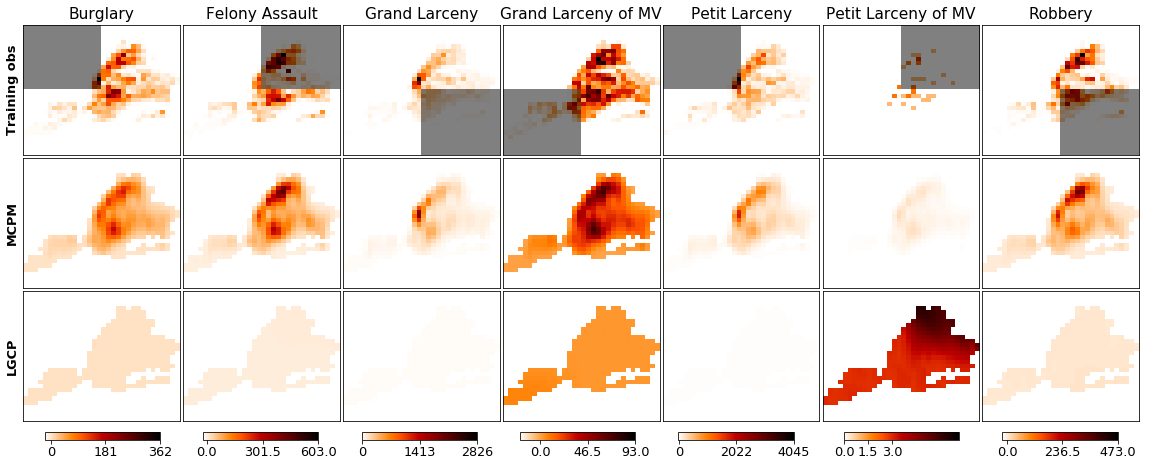

In [63]:
fold = 0
task = 0
mpl.rcParams.update({'font.size': 12.8})
size_cbar_ticks = 13
rescale = 20
cmap = "gist_heat_r"
inducing = 'ind'
norm = mpl.colors.Normalize(vmin=-100.,vmax=100)

extent = (np.amin(final_dataset_MT_Normal[fold,:,0]), 
          np.amax(final_dataset_MT_Normal[fold,:,0]), 
          np.amin(final_dataset_MT_Normal[fold,:,1]), 
          np.amax(final_dataset_MT_Normal[fold,:,1]))

fig, axs = plt.subplots(3,7, sharex = 'col', sharey = 'row')
fig.set_figheight(7.3)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)
pad = 0.005
axs = axs.ravel()

for i in range(21):
    if i in range(0,7):
        color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9], 
                                            final_dataset_ST_Normal[fold, :, i + 9],
                                           data_final_with_NOna[:,i][~np.isnan(data_final_with_NOna[:,i])])))
        color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9], 
                                            final_dataset_ST_Normal[fold, :, i + 9],
                                           data_final_with_NOna[:,i][~np.isnan(data_final_with_NOna[:,i])])))

        
        axs[i].imshow(data_final_with_NOna[:, i].reshape(N,N)*cell_inside, extent=extent, 
                 aspect = 'auto', cmap=cmap, interpolation='None',
                 vmin = color_min, vmax = color_max)
        
        axs[i].imshow(masked_array[i], interpolation='nearest', cmap = cmap1, alpha = transparency,
          extent=extent)
        
        axs[i].title.set_text(crime_list_name[i])
        

        
        #cbar = plt.colorbar(im[i], ax = axs[i],orientation="horizontal", pad=pad, shrink = shrink, ticks = b)
        #cbar.ax.tick_params(labelsize=size_cbar_ticks)

        axs[i].set_yticks([])
        axs[i].set_xticks([])         
        if i == 0:
             axs[i].set_ylabel('Training obs', fontweight="bold")

    if i in range(7,14):
        color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 7 ],
                                           data_final_with_NOna[:,i-7][~np.isnan(data_final_with_NOna[:,i -7])])))
        
        color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 7],
                                           data_final_with_NOna[:,i-7][~np.isnan(data_final_with_NOna[:,i -7])])))
        color_min = color_min - rescale

        if i == 12:
            color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 7 ],
                                           data_final_with_NOna[:,i-7][~np.isnan(data_final_with_NOna[:,i -7])])))
        
            color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 7],
                                           data_final_with_NOna[:,i-7][~np.isnan(data_final_with_NOna[:,i -7])])))

        axs[i].imshow(final_dataset_MT_Normal[fold, :, i + 9 - 7].reshape(N,N)*cell_inside, extent=extent, 
                 aspect = 'auto', cmap=cmap, interpolation='None',
                 vmin = color_min, vmax = color_max)
        if i == 7:
             axs[i].set_ylabel('MCPM', fontweight="bold")

    if i in range(14,21):
        color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 14], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 14 ],
                                           data_final_with_NOna[:,i-14][~np.isnan(data_final_with_NOna[:,i -14])])))
        
        color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 14], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 14],
                                           data_final_with_NOna[:,i-14][~np.isnan(data_final_with_NOna[:,i -14])])))
        color_min = color_min - rescale
        if i == 19:
            color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 14], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 14 ],
                                           data_final_with_NOna[:,i-14][~np.isnan(data_final_with_NOna[:,i -14])])))
            color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 14], 
                                            final_dataset_ST_Normal[fold, :, i + 9 - 14],
                                           data_final_with_NOna[:,i-14][~np.isnan(data_final_with_NOna[:,i -14])])))

        im[i - 14] = axs[i].imshow(final_dataset_ST_Normal[fold,:, 9 + i - 14].reshape(N,N)*cell_inside, extent=extent, 
                      aspect = 'auto', cmap=cmap, interpolation='None',
                      vmin = color_min, vmax = color_max)


        if i == 14:
             axs[i].set_ylabel('LGCP', fontweight="bold")

        b = bounds[i-14]
        #cbar = plt.colorbar(im[i-14], ax = axs[i],orientation="horizontal", pad=pad, shrink = shrink, ticks = b)
        #cbar.ax.tick_params(labelsize=size_cbar_ticks)
        if i == 14:

            cbaxes1 = fig.add_axes([0.14, 0.09, 0.08, 0.015])
            fig.colorbar(im[i-14], cax = cbaxes1, orientation="horizontal", ticks = b)
        if i == 15:
            cbaxes2 = fig.add_axes([0.25, 0.09, 0.08, 0.015])
            fig.colorbar(im[i-14], cax = cbaxes2, orientation="horizontal", ticks = b)  
        if i == 16:
            cbaxes3 = fig.add_axes([0.36, 0.09, 0.08, 0.015])
            fig.colorbar(im[i-14], cax = cbaxes3, orientation="horizontal", ticks = b)  

        if i == 17:
            cbaxes4 = fig.add_axes([0.47, 0.09, 0.08, 0.015])
            fig.colorbar(im[i-14], cax = cbaxes4, orientation="horizontal", ticks = b)  

        if i == 18:
            cbaxes5 = fig.add_axes([0.58, 0.09, 0.08, 0.015])
            fig.colorbar(im[i-14], cax = cbaxes5, orientation="horizontal", ticks = b)  
        if i == 19:
            cbaxes6 = fig.add_axes([0.695, 0.09, 0.08, 0.015])
            fig.colorbar(im[i-14], cax = cbaxes6, orientation="horizontal", ticks = b)  
        if i == 20:
            cbaxes7 = fig.add_axes([0.805, 0.09, 0.08, 0.015])
            fig.colorbar(im[i-14], cax = cbaxes7, orientation="horizontal", ticks = b)  

    axs[i].grid(False)
    axs[i].set_yticks([]) 
    axs[i].set_xticks([]) 
    axs[i].grid(False)
    
#name = "all_crime" + str(cmap)
#fig.savefig(name + '.png')

plt.show()

# Plot LGCPN - ICM for NIPS

In [65]:
mu = np.load('../Data/crime_experiments/posterior_mean.npy')
var = np.load('../Data/crime_experiments/posterior_var.npy')

posterior_mean = np.exp(mu + 0.5*var)
posterior_var = (np.exp(var) - 1.)*np.exp(2.0*mu + var)

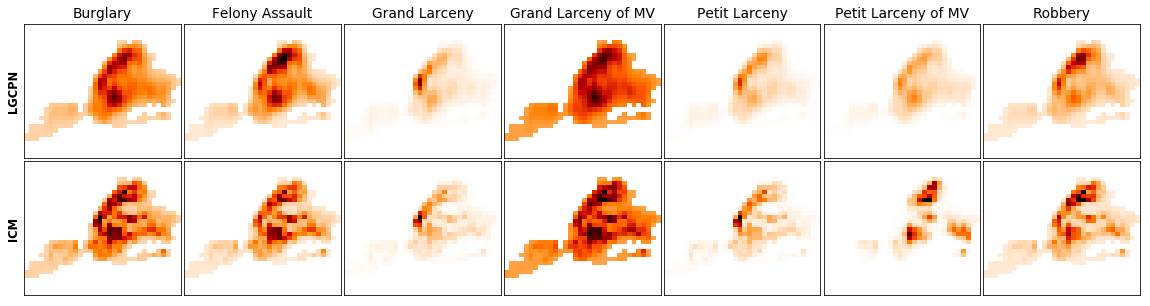

In [66]:
fold = 0
task = 0
mpl.rcParams.update({'font.size': 11.5})
size_cbar_ticks = 15
rescale = 20
cmap = "gist_heat_r"
inducing = 'ind'
norm = mpl.colors.Normalize(vmin=-100.,vmax=100)

extent = (np.amin(final_dataset_MT_Normal[fold,:,0]), 
          np.amax(final_dataset_MT_Normal[fold,:,0]), 
          np.amin(final_dataset_MT_Normal[fold,:,1]), 
          np.amax(final_dataset_MT_Normal[fold,:,1]))

fig, axs = plt.subplots(2,7, sharex = 'col', sharey = 'row')
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)

axs = axs.ravel()

for i in range(14):


    if i in range(0,7):
        color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9], posterior_mean[fold, :, i])))
        color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9], posterior_mean[fold, :, i])))
        
#         color_max = np.amax(final_dataset_MT_Normal[fold, :, i + 9])
#         color_min = np.amin(final_dataset_MT_Normal[fold, :, i + 9])
        color_min = color_min - rescale
        if i == 5:
            color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9], posterior_mean[fold, :, i])))
            color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9], posterior_mean[fold, :, i])))
            
#             color_max = np.amax(final_dataset_MT_Normal[fold, :, i + 9])
#             color_min = np.amin(final_dataset_MT_Normal[fold, :, i + 9])

#         print('max', color_max)
#         print('min', color_min)
        axs[i].imshow(final_dataset_MT_Normal[fold, :, i + 9].reshape(N,N)*cell_inside, extent=extent, 
                 aspect = 'auto', cmap=cmap, interpolation='None',
                 vmin = color_min, vmax = color_max)
        axs[i].title.set_text(crime_list_name[i])

        if i == 0:
             axs[i].set_ylabel('LGCPN', fontweight="bold")

    if i in range(7,14):

        color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], posterior_mean[fold, :, i-7])))
        color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], posterior_mean[fold, :, i-7])))
        color_min = color_min - rescale
        if i == 12:
            color_max = np.amax(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], posterior_mean[fold, :, i-7])))
            color_min = np.amin(np.concatenate((final_dataset_MT_Normal[fold, :, i + 9 - 7], posterior_mean[fold, :, i-7])))
            
        axs[i].imshow(posterior_mean[fold,:, i - 7].reshape(N,N)*cell_inside, extent=extent, 
                      aspect = 'auto', cmap=cmap, interpolation='None',
                      vmin = color_min, vmax = color_max)


        if i == 7:
             axs[i].set_ylabel('ICM', fontweight="bold")

    axs[i].grid(False)
    axs[i].set_yticks([]) 
    axs[i].set_xticks([]) 
    axs[i].grid(False)
    
name = "crime_NLPL_ICM" + str(cmap)
fig.savefig(name + '.png')
plt.show()

In [67]:
fold = 0
cp_ICM = np.zeros((N_all,n_tasks))
for t in xrange(n_tasks):
    cp_ICM[:,t] = posterior_mean[fold,:, t]/np.sum(posterior_mean[fold,:, :], axis = 1)

# Plot of cond prob for appendix


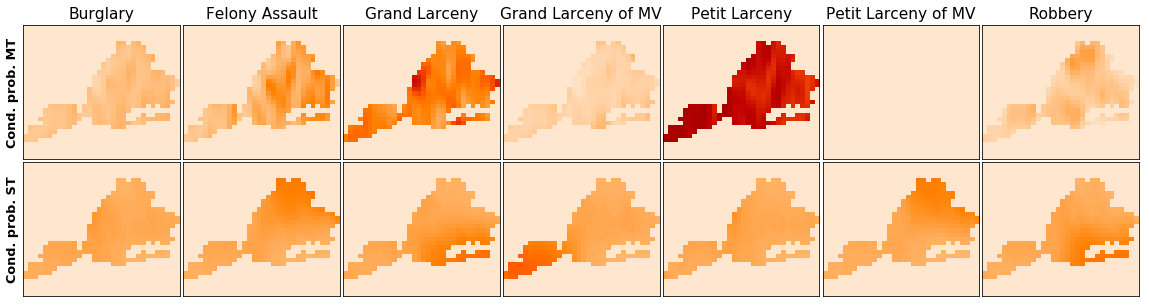

In [88]:
fold = 0
task = 0
mpl.rcParams.update({'font.size': 12.8})
size_cbar_ticks = 15
rescale = 20
cmap = "gist_heat_r"
inducing = 'ind'
norm = mpl.colors.Normalize(vmin=-100.,vmax=100)

extent = (np.amin(final_dataset_MT_Normal[fold,:,0]), 
          np.amax(final_dataset_MT_Normal[fold,:,0]), 
          np.amin(final_dataset_MT_Normal[fold,:,1]), 
          np.amax(final_dataset_MT_Normal[fold,:,1]))

fig, axs = plt.subplots(2,7, sharex = 'col', sharey = 'row')
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)

axs = axs.ravel()

for i in range(14):

    color_max = 1
    color_min = 0 - 0.05
    if i in range(0,7):
        axs[i].imshow(cp_LGCPN_Normal[:,i].reshape(N,N)*cell_inside, extent=extent, 
                 aspect = 'auto', cmap=cmap, interpolation='None',
                 vmin = color_min, vmax = color_max)
        axs[i].title.set_text(crime_list_name[i])

        if i == 0:
             axs[i].set_ylabel('Cond. prob. MT', fontweight="bold")

    if i in range(7,14):


        axs[i].imshow(cp_LGCP_ST_Normal[:, i - 7].reshape(N,N)*cell_inside, extent=extent, 
                      aspect = 'auto', cmap=cmap, interpolation='None',
                      vmin = color_min, vmax = color_max)


        if i == 7:
             axs[i].set_ylabel('Cond. prob. ST', fontweight="bold")

    axs[i].grid(False)
    axs[i].set_yticks([]) 
    axs[i].set_xticks([]) 
    axs[i].grid(False)
    
#name = "Figure_appendix_crime_condprob_MT_ST" + str(cmap)
#fig.savefig(name + '.png')
plt.show()

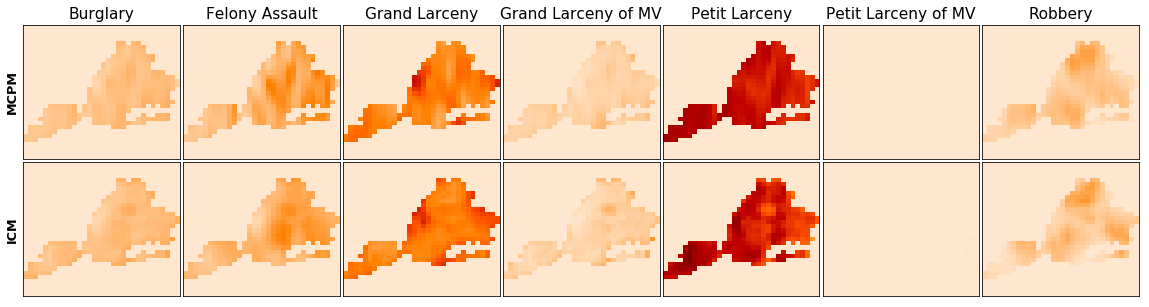

In [89]:
fold = 0
task = 0
mpl.rcParams.update({'font.size': 12.8})
size_cbar_ticks = 15
rescale = 20
cmap = "gist_heat_r"
inducing = 'ind'
norm = mpl.colors.Normalize(vmin=-100.,vmax=100)

extent = (np.amin(final_dataset_MT_Normal[fold,:,0]), 
          np.amax(final_dataset_MT_Normal[fold,:,0]), 
          np.amin(final_dataset_MT_Normal[fold,:,1]), 
          np.amax(final_dataset_MT_Normal[fold,:,1]))

fig, axs = plt.subplots(2,7, sharex = 'col', sharey = 'row')
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)

axs = axs.ravel()

for i in range(14):

    color_max = 1
    color_min = 0 - 0.05
    if i in range(0,7):
        axs[i].imshow(cp_LGCPN_Normal[:,i].reshape(N,N)*cell_inside, extent=extent, 
                 aspect = 'auto', cmap=cmap, interpolation='None',
                 vmin = color_min, vmax = color_max)
        axs[i].title.set_text(crime_list_name[i])

        if i == 0:
             axs[i].set_ylabel('MCPM', fontweight="bold")

    if i in range(7,14):


        axs[i].imshow(cp_ICM[:, i - 7].reshape(N,N)*cell_inside, extent=extent, 
                      aspect = 'auto', cmap=cmap, interpolation='None',
                      vmin = color_min, vmax = color_max)


        if i == 7:
             axs[i].set_ylabel('ICM', fontweight="bold")

    axs[i].grid(False)
    axs[i].set_yticks([]) 
    axs[i].set_xticks([]) 
    axs[i].grid(False)
    
#name = "Figure_appendix_crime_condprob_LGCPN_ICM" + str(cmap)
#fig.savefig(name + '.png')
plt.show()

# Evaluation of performance for MT

In [90]:
mean_outputs = np.mean(outputs, axis = 0)
range_outputs = np.ptp(outputs, axis = 0)

In [91]:
cell_inside = np.loadtxt('../Data/crime_experiments/cell_inside_ny')
cell_inside = cell_inside.reshape(N,N)
cell_inside[cell_inside == 0] = np.nan

In [92]:
cell_inside[~np.isnan(cell_inside)] = True
cell_inside[np.isnan(cell_inside)] = False


In [93]:
MT_RMSE_results = np.zeros((n_tasks))
MT_NLPL_results = np.zeros((n_tasks))
MT_RMSE_results_inter = np.zeros((n_tasks, n_folds))
MT_NLPL_results_inter = np.zeros((n_tasks, n_folds))

MT_GP_NLPL_results = np.zeros((n_tasks))
MT_GP_RMSE_results = np.zeros((n_tasks))
MT_GP_NLPL_results_inter = np.zeros((n_tasks, n_folds))
MT_GP_RMSE_results_inter = np.zeros((n_tasks, n_folds))


ST_RMSE_results = np.zeros((n_tasks))
ST_NLPL_results = np.zeros((n_tasks))
ST_RMSE_results_inter = np.zeros((n_tasks, n_folds))
ST_NLPL_results_inter = np.zeros((n_tasks, n_folds))


In [94]:
for task in xrange(n_tasks):
    for fold in xrange(n_folds):
        fold_task_subset = data_final_with_na[fold,:,task+2]
        #cond = np.isnan(fold_task_subset)
        cond = np.logical_and(cell_inside, np.isnan(fold_task_subset).reshape(N,N)).reshape(N_all,1)[:,0]

        # this is step is to consider cells inside, in this case they are all considered inside. 
        true_counts =  outputs[cond,task]
        #print('true counts size', true_counts.shape)
        pred_counts =  final_dataset_MT_Normal[fold,cond,task+9]
#         print('fold', fold)
#         print('task', task)
#         print('pred counts size', pred_counts.shape[0])
        if pred_counts.shape[0] == 0:
            MT_NLPL_results_inter[task,fold] = np.nan
            MT_RMSE_results_inter[task,fold] = np.nan 
        else:
#             print('true_counts', true_counts)
#             print('pred_counts', pred_counts)
#             print('pred_counts.shape[0]', pred_counts.shape[0])
#             print('ratio 1', np.sum(np.square(true_counts - pred_counts)))
#             print('ratio', np.sum(np.square(true_counts - pred_counts))/pred_counts.shape[0])
#             print('ratio 2', np.sqrt(np.sum(np.square(true_counts - pred_counts))/pred_counts.shape[0]))
#             print('ratio 3', np.sqrt(np.sum(np.square(true_counts - pred_counts))))
#             print('np.sum(np.square(true_counts - pred_counts)', np.sqrt(np.sum(np.square(true_counts - pred_counts))/pred_counts.shape[0]))
            
            MT_NLPL_results_inter[task,fold] = - np.sum(poisson.logpmf(true_counts, pred_counts))/pred_counts.shape[0]
            MT_RMSE_results_inter[task,fold] = np.sqrt(np.sum(np.square(true_counts - pred_counts))/pred_counts.shape[0])        

IndexError: index 1 is out of bounds for axis 0 with size 1

In [95]:
for t in xrange(n_tasks):
    MT_RMSE_results[t] = np.mean(MT_RMSE_results_inter[t][~np.isnan(MT_RMSE_results_inter[t])]/mean_outputs[t])
    MT_NLPL_results[t] = np.mean(MT_NLPL_results_inter[t][~np.isnan(MT_NLPL_results_inter[t])]/mean_outputs[t])
print('MT_RMSE_results mean', MT_RMSE_results)
print('MT_NLPL_results mean', MT_NLPL_results)

('MT_RMSE_results mean', array([1.80894733, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ]))
('MT_NLPL_results mean', array([0.64160641, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ]))


In [97]:
for fold in xrange(n_folds):

    for task in xrange(n_tasks):
        fold_task_subset = data_final_with_na[fold,:,task+2]
        cond = np.logical_and(cell_inside, np.isnan(fold_task_subset).reshape(N,N)).reshape(N_all,1)[:,0]

        # this is step is to consider cells inside, in this case they are all considered inside. 
        true_counts =  outputs[cond,task]
#         print('true counts size', true_counts.shape)
        pred_counts =  final_dataset_MT_GP[fold,cond,task+9]
#         print('pred counts size', pred_counts.shape)
        if pred_counts.shape[0] == 0:
            MT_GP_NLPL_results_inter[task,fold] = np.nan
            MT_GP_RMSE_results_inter[task,fold] = np.nan 
        else:
            MT_GP_NLPL_results_inter[task,fold] = - np.sum(poisson.logpmf(true_counts, pred_counts))/pred_counts.shape[0]
            MT_GP_RMSE_results_inter[task,fold] = np.sqrt(np.sum(np.square(true_counts - pred_counts))/pred_counts.shape[0])             


IndexError: index 1 is out of bounds for axis 0 with size 1

In [98]:
for t in xrange(n_tasks):
    MT_GP_RMSE_results[t] = np.mean(MT_GP_RMSE_results_inter[t][~np.isnan(MT_GP_RMSE_results_inter[t])]/mean_outputs[t])
    MT_GP_NLPL_results[t] = np.mean(MT_GP_NLPL_results_inter[t][~np.isnan(MT_GP_NLPL_results_inter[t])]/mean_outputs[t])
print('MT_GP_RMSE_results mean', MT_GP_RMSE_results)
print('MT_GP_NLPL_results mean', MT_GP_NLPL_results)



('MT_GP_RMSE_results mean', array([1.80894733, 0.89895266, 0.35498737, 0.27577131, 2.91271585,
       3.10880276, 0.7739915 ]))
('MT_GP_NLPL_results mean', array([0.64160641, 0.33595044, 0.11337679, 0.13704659, 0.80778756,
       2.78668406, 0.28343501]))


In [99]:
for fold in xrange(n_folds):

    for task in xrange(n_tasks):
        fold_task_subset = data_final_with_na[fold,:,task+2]
        cond = np.logical_and(cell_inside, np.isnan(fold_task_subset).reshape(N,N)).reshape(N_all,1)[:,0]

        # this is step is to consider cells inside, in this case they are all considered inside. 
        true_counts =  outputs[cond,task]
        pred_counts =  final_dataset_ST_Normal[fold,cond,task+9]
#         print('true counts size', true_counts.shape)
#         print('pred counts size', pred_counts.shape)
        if pred_counts.shape[0] == 0:
            ST_NLPL_results_inter[task,fold] = np.nan
            MST_RMSE_results_inter[task,fold] = np.nan 
        else:
            ST_NLPL_results_inter[task,fold] = - np.sum(poisson.logpmf(true_counts, pred_counts))/pred_counts.shape[0]
            ST_RMSE_results_inter[task,fold] = np.sqrt(np.sum(np.square(true_counts - pred_counts))/pred_counts.shape[0])             


IndexError: index 1 is out of bounds for axis 0 with size 1

In [100]:
for t in xrange(n_tasks):
    ST_RMSE_results[t] = np.mean(ST_RMSE_results_inter[t][~np.isnan(ST_RMSE_results_inter[t])]/mean_outputs[t])
    ST_NLPL_results[t] = np.mean(ST_NLPL_results_inter[t][~np.isnan(ST_NLPL_results_inter[t])]/mean_outputs[t])
print('ST_RMSE_results mean', ST_RMSE_results)
print('ST_NLPL_results mean', ST_NLPL_results)


('ST_RMSE_results mean', array([ 3.0119559 ,  1.77884006,  0.86543316,  0.51074284,  5.85263881,
       32.49430087,  1.3628417 ]))
('ST_NLPL_results mean', array([ 6.60087798,  2.75918012,  1.72231316,  0.42688301, 23.3893895 ,
       31.3878713 ,  2.04905005]))


In [101]:
# Alternative computation of NLPL
# Use this if you want to compute the NLPL performance sampling from the posterior distrbutions
# Same can be repeated for ST and MT_GP results
np.random.seed(1)
n_samples = 10
intensity_sample = np.zeros((n_folds, n_samples, N_all,n_tasks ))
latent_fun_sample = np.zeros((n_folds, n_samples, N_all,n_latent ))
weights_sample = np.zeros((n_folds, n_samples, n_tasks,n_latent ))
nlpl_fold_task = np.zeros((n_folds, n_samples, n_tasks))
first_std = np.zeros((n_folds, n_tasks))
first_mean = np.zeros((n_folds, n_tasks))
std = np.zeros(( n_tasks))
mean = np.zeros((n_tasks))

In [117]:
for fold in xrange(n_folds):
    for task in xrange(n_tasks):
        latent_means = latent_means_MT_Normal[fold]
        latent_vars = latent_vars_MT_Normal[fold]
        means_w = np.transpose(means_w_MT_Normal[fold])
        vars_w = vars_w_MT_Normal[fold]
        diagonal_variance = np.zeros((n_latent, n_tasks))
        for q in xrange(n_latent):
            diagonal_variance[q] = np.diagonal(vars_w[q])
    
        latent_fun_sample[fold] = np.random.normal(latent_means, np.sqrt(latent_vars), size = (n_samples, N_all, n_latent))
        weights_sample[fold] = np.random.normal(means_w, np.transpose(np.sqrt(diagonal_variance)), size = (n_samples, n_tasks, n_latent))


IndexError: index 1 is out of bounds for axis 0 with size 1

In [118]:
for fold in xrange(n_folds):
    for i in xrange(n_samples):
        intensity_sample[fold, i] = np.exp(np.transpose(np.dot(weights_sample[fold, i],
                                                               np.transpose(latent_fun_sample[fold, i]))) + offsets_MT_Normal[fold])
    

IndexError: index 1 is out of bounds for axis 0 with size 1

In [119]:
for fold in xrange(n_folds):
    for i in xrange(n_samples):
        for task in xrange(n_tasks):
            fold_task_subset = data_final_with_na[fold,:,task+2]
            cond = np.logical_and(cell_inside, np.isnan(fold_task_subset).reshape(N,N)).reshape(N_all,1)[:,0]

            true_counts =  outputs[cond,task]
            pred_counts = intensity_sample[fold, i, :,task][cond]
            if pred_counts.shape[0] == 0:
                nlpl_fold_task[fold,i,task] = np.nan
            else:
                nlpl_fold_task[fold,i,task] = - np.sum(poisson.logpmf(true_counts, pred_counts))/pred_counts.shape[0]  

for f in xrange(n_folds):
    for t in xrange(n_tasks):
#         print('f', f)
#         print('t', t)
        # This is computing the mean and std across S
        first_std[f,t] = np.std(nlpl_fold_task[f, :, t][~np.isnan(nlpl_fold_task[f, :, t])])
#         print('first_std', first_std[f,t])
        first_mean[f,t] = np.mean(nlpl_fold_task[f, :, t][~np.isnan(nlpl_fold_task[f, :, t])])
#         print('first_mean', first_mean[f,t])
        
for t in xrange(n_tasks):
    # This is computing the mean and std across folds
    std[t] = np.std(first_mean[:,t][~np.isnan(first_mean[:,t])]/mean_outputs[t])/np.sqrt(n_folds)
    mean[t] = np.mean(first_mean[:,t][~np.isnan(first_mean[:,t])]/mean_outputs[t])



/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [120]:
mean

array([inf, inf, inf, inf, inf, inf, inf])

In [121]:
std

array([nan, nan, nan, nan, nan, nan, nan])

# Costruct histograms for MT

In [81]:
np.random.seed(1)

In [125]:
# Histograms for MT
n_samples = 1
divide = 1
intensity_sample = np.zeros((n_folds, n_samples, N_all,n_tasks))
latent_fun_sample = np.zeros((n_folds, n_samples, N_all,n_latent))
weights_sample = np.zeros((n_folds, n_samples, n_tasks,n_latent))
counts_to_aggregate = np.zeros((n_folds, n_samples, N_all,n_tasks))
counts_alternative = np.zeros((n_folds, n_samples, n_tasks))


counts_missing_to_aggregate = np.zeros((n_folds, (N_all/4), n_samples,n_tasks))
counts_NONmissing_to_aggregate = np.zeros((n_folds, N_all-(N_all/4), n_samples,n_tasks))
outputs_missing_to_aggregate = np.zeros((n_folds, N_all/4,n_tasks))


# Sample from latent function and weights
for fold in xrange(n_folds):
    for task in xrange(n_tasks):
        latent_means = latent_means_MT_Normal[fold]
        latent_vars = latent_vars_MT_Normal[fold]
        means_w = means_w_MT_Normal[fold]
        vars_w = vars_w_MT_Normal[fold]
        latent_fun_sample[fold] = np.random.normal(latent_means, np.sqrt(latent_vars), size = (n_samples, N_all, n_latent)) 
        weights_sample[fold] = np.random.normal(means_w, np.sqrt(vars_w), size = (n_samples, n_tasks, n_latent))

# Generate samples for the intensity 
for fold in xrange(n_folds):
    for i in xrange(n_samples):
        intensity_sample[fold, i] = np.exp(np.transpose(np.dot(weights_sample[fold, i],
                                                               np.transpose(latent_fun_sample[fold, i]))) + offsets_MT_Normal[fold])

# Sample from Poisson with generated intensity and aggregates counts per cells to have overall
# number of events in the area
for fold in xrange(n_folds):
    for i in xrange(n_samples):
        for t in xrange(n_tasks):
            #print('lambda', intensity_sample[fold, i,:,t])
            #print('lambda2', np.sum(intensity_sample, axis = 2))
            counts_to_aggregate[fold, i,:,t] = np.random.poisson(intensity_sample[fold, i,:,t]/divide)
counts = np.sum(counts_to_aggregate, axis = 2)

# Sample from Poisson(sum lambda)
sum_intensity = np.sum(intensity_sample, axis = 2)
for fold in xrange(n_folds):
    for i in xrange(n_samples):
        for t in xrange(n_tasks):
            #print('lambda', sum_intensity[fold, i, t])
            counts_alternative[fold, i, t] = np.random.poisson(sum_intensity[fold, i, t]/divide)




# Aggregate only events for the missing data region 
for fold in xrange(n_folds):
    for task in xrange(n_tasks):        
        counts_missing_to_aggregate[fold, :,:,task] = counts_to_aggregate[fold,:,np.isnan(data_final_with_na[fold,:,task + 2]),task]
        counts_NONmissing_to_aggregate[fold, :,:,task] = counts_to_aggregate[fold,:,~np.isnan(data_final_with_na[fold,:,task + 2]),task]

counts_missing_region = np.sum(counts_missing_to_aggregate, axis = 1)/divide
counts_NONmissing_region = np.sum(counts_NONmissing_to_aggregate, axis = 1)

# Select data for the missing data region 
for fold in xrange(n_folds):
    for task in xrange(n_tasks):
        output_missing = outputs[np.isnan(data_final_with_na[fold,:,2+task]), task]
        #output_missing = output_missing.reshape(N_all/4,n_tasks)
        outputs_missing_to_aggregate[fold,:,task] = output_missing

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [126]:
# Plot histogram for ICM
mu = np.load('../Data/crime_experiments/posterior_mean.npy')
var = np.load('../Data/crime_experiments/posterior_var.npy')


In [127]:
# Histograms for ICM
n_samples = 1000
divide = 1
intensity_sample = np.zeros((n_folds, n_samples, N_all,n_tasks))
latent_fun_sample = np.zeros((n_folds, n_samples, N_all,n_latent))
weights_sample = np.zeros((n_folds, n_samples, n_tasks,n_latent))
counts_to_aggregate = np.zeros((n_folds, n_samples, N_all,n_tasks))
counts_alternative = np.zeros((n_folds, n_samples, n_tasks))


counts_missing_to_aggregate = np.zeros((n_folds, (N_all/4), n_samples,n_tasks))
outputs_missing_to_aggregate = np.zeros((n_folds, N_all/4,n_tasks))
outputs_NONmissing_to_aggregate = np.zeros((n_folds,N_all- N_all/4,n_tasks))

# Simulate from the log normal with mean m_f and variance sigma_f
# This gives sample for the intensity 

for fold in xrange(n_folds):
    for i in xrange(n_samples):
        latent_means = mu[fold]
        latent_vars = var[fold]
        intensity_sample[fold, i] = np.random.lognormal(mean=latent_means, sigma=np.sqrt(latent_vars))
        
# Simulate the counts
for fold in xrange(n_folds):
    for i in xrange(n_samples):
         counts_to_aggregate[fold, i] = np.random.poisson(intensity_sample[fold, i])
counts = np.sum(counts_to_aggregate, axis = 2) 

In [128]:
# Subset the counts to aggregate
# Aggregate only events for the missing data region 
for fold in xrange(n_folds):
    for task in xrange(n_tasks):        
        counts_missing_to_aggregate[fold, :,:,task] = counts_to_aggregate[fold,:,np.isnan(data_final_with_na[fold,:,task + 2]),task]
        counts_NONmissing_to_aggregate[fold, :,:,task] = counts_to_aggregate[fold,:,~np.isnan(data_final_with_na[fold,:,task + 2]),task]


counts_missing_region = np.sum(counts_missing_to_aggregate, axis = 1)
counts_NONmissing_region = np.sum(counts_NONmissing_to_aggregate, axis = 1)

ValueError: could not broadcast input array from shape (768,1000) into shape (768,1)

In [129]:
# Select data for the missing data region 
for fold in xrange(n_folds):
    for task in xrange(n_tasks):
        output_missing = outputs[np.isnan(data_final_with_na[fold,:,2+task]), task]
        output_NONmissing = outputs[~np.isnan(data_final_with_na[fold,:,2+task]), task]
        
        #output_missing = output_missing.reshape(N_all/4,n_tasks)
        outputs_missing_to_aggregate[fold,:,task] = output_missing
        outputs_NONmissing_to_aggregate[fold,:,task] = output_NONmissing

In [130]:
task = 0
fold = 0 
counts_observed = np.sum(outputs, axis = 0)
counts_missing = np.sum(outputs_missing_to_aggregate, axis = 1)
counts_NONmissing = np.sum(outputs_NONmissing_to_aggregate, axis = 1)

intensity_aggregated = np.sum(intensity_sample, axis = 2)

In [131]:
ICM_counts_missing =  counts_missing_region
ICM_counts_NONmissing = counts_NONmissing_region

NameError: name 'counts_missing_region' is not defined

NameError: name 'LGCPN_counts_non_missing' is not defined

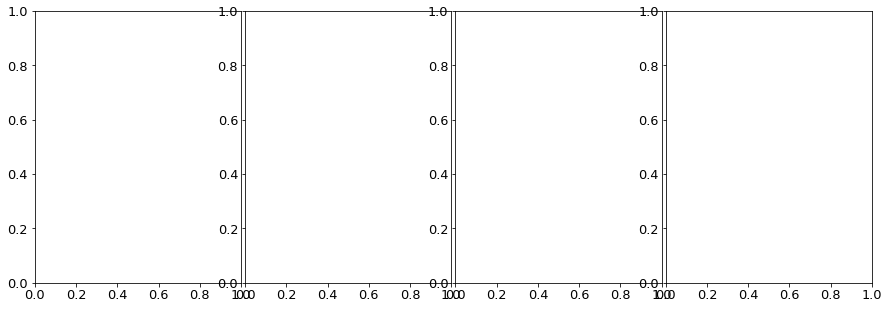

In [132]:
fig, ax = plt.subplots(1,4)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.02)
fig.subplots_adjust(wspace=0.02)
label_size = 11
color_line_mean = 'black'
color_line_obs = 'lime'
vertical_line_wid = 2.5

n, b, p = ax[0].hist(LGCPN_counts_non_missing[fold, :, task], 100, alpha=0.75, color='w', edgecolor='k')
ax[0].axvline(counts_NONmissing[fold, task], color=color_line_obs, linewidth=vertical_line_wid, label='Observed N')
ax[0].axvline(np.percentile(LGCPN_counts_non_missing[fold, :, task], 95), color='r', linestyle='dashed', linewidth=vertical_line_wid)
ax[0].axvline(np.percentile(LGCPN_counts_non_missing[fold, :, task], 5), color='r', linestyle='dashed', linewidth=vertical_line_wid, label='90% CI')
ax[0].axvline(np.percentile(LGCPN_counts_non_missing[fold, :, task], 50), color=color_line_mean, linestyle='dashed', linewidth=vertical_line_wid, label='Post. mean')
ax[0].set_yticks([]) 
#ax[0].set_xlim([8000,16000])
ax[0].legend(loc=8)
ax[0].tick_params(axis = 'both', which = 'major', labelsize = label_size)
ax[0].set_title(r"MCPM  " r'$p(N|\mathcal{D})$')

ax[1].hist(ICM_counts_NONmissing[fold, :, task], 100, alpha=0.75, color='w', edgecolor='k')
ax[1].axvline(counts_NONmissing[fold, task], color=color_line_obs, linewidth=vertical_line_wid, label='Observed N')
ax[1].axvline(np.percentile(ICM_counts_NONmissing[fold, :, task], 95), color='r', linestyle='dashed', linewidth=vertical_line_wid)
ax[1].axvline(np.percentile(ICM_counts_NONmissing[fold, :, task], 5), color='r', linestyle='dashed', linewidth=vertical_line_wid, label='90% CI')
ax[1].axvline(np.percentile(ICM_counts_NONmissing[fold, :, task], 50), color=color_line_mean, linestyle='dashed', linewidth=vertical_line_wid, label='Post. mean')
ax[1].set_yticks([]) 
ax[1].tick_params(axis = 'both', which = 'major', labelsize = label_size)
ax[1].set_title(r"ICM  " r'$p(N|\mathcal{D})$')
ax[1].legend(loc=8)


ax[2].hist(LGCPN_counts_missing[fold, :, task], 100, alpha=0.75, color='w', edgecolor='k')
ax[2].axvline(counts_missing[fold, task], color=color_line_obs, linewidth=vertical_line_wid, label='Observed N')
ax[2].axvline(np.percentile(LGCPN_counts_missing[fold, :, task], 95), color='r', linestyle='dashed', linewidth=vertical_line_wid)
ax[2].axvline(np.percentile(LGCPN_counts_missing[fold, :, task], 5), color='r', linestyle='dashed', linewidth=vertical_line_wid, label='90% CI')
ax[2].axvline(np.percentile(LGCPN_counts_missing[fold, :, task], 50), color=color_line_mean, linestyle='dashed', linewidth=vertical_line_wid, label='Post. mean')
ax[2].set_yticks([])
ax[2].legend(loc=8)
ax[2].tick_params(axis = 'both', which = 'major', labelsize = label_size)
ax[2].set_title(r"MCPM  " r'$p(N^*|\mathcal{D})$')


ax[0].xaxis.set_ticks(np.arange(10500, 14000, 1000))
ax[1].xaxis.set_ticks(np.arange(10500, 14000, 1000))
ax[2].xaxis.set_ticks(np.arange(900, 2000, 300))
ax[3].xaxis.set_ticks(np.arange(900, 2000, 300))

ax[0].set_xlim(10000,14000)
ax[1].set_xlim(10000,14000)
ax[2].set_xlim(800,2000)
ax[3].set_xlim(800,2000)



ax[3].hist(ICM_counts_missing[fold, :, task], 100, alpha=0.75, color='w', edgecolor='k')
ax[3].axvline(counts_missing[fold, task], color=color_line_obs, linewidth=vertical_line_wid, label='Observed N')
ax[3].axvline(np.percentile(ICM_counts_missing[fold, :, task], 95), color='r', linestyle='dashed', linewidth=vertical_line_wid)
ax[3].axvline(np.percentile(ICM_counts_missing[fold, :, task], 5), color='r', linestyle='dashed', linewidth=vertical_line_wid, label='90% CI')
ax[3].axvline(np.percentile(ICM_counts_missing[fold, :, task], 50), color=color_line_mean, linestyle='dashed', linewidth=vertical_line_wid, label='Post. mean')
ax[3].set_yticks([]) 
# axs[i].set_xticks([])
ax[3].legend(loc=8)
ax[3].tick_params(axis = 'both', which = 'major', labelsize = label_size)
ax[3].set_title(r"ICM  " r'$p(N^*|\mathcal{D})$')
#ax[3].xaxis.set_ticks(np.arange(900, 1200, 200))


#fontsize=40
#name = "Histograms_icm_lgcpn_crime" + str(cmap)
#fig.savefig(name + '.png')
plt.show()